# Solowmodel with immigration

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
from sympy.solvers import solve
from sympy import Symbol, symbols, Eq, solve
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

from tabulate import tabulate

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject
from modelproject import SolowModelClass
model = SolowModelClass()

The Solow model with immigrant workers is an extension of the Solow-Swan growth model that takes into account the impact of immigration on economic growth. In this model, immigrants are treated as a separate factor of production and are assumed to have a different productivity level than native workers.

The purpose of this model is to analyze the effect of immigration on the long-run economic growth of a country. By incorporating immigrant workers, the model can capture the impact of changes in the immigrant population on key economic variables such as output, capital accumulation, and technology.

In the Solow model with immigrant workers, the economy is assumed to produce a single good using physical capital and labor, where labor is composed of two types of workers: native and immigrant workers. The productivity of immigrant workers is assumed to be different from that of native workers, and this difference is captured by a parameter that represents the degree of substitutability between the two types of labor.

The model also incorporates the dynamics of capital accumulation and technological progress, as in the original Solow-Swan model. However, the addition of immigrant workers introduces some new features, such as the effect of immigration on the savings rate, the impact of immigration on the real wage rate of native workers, and the effect of immigration on the long-run rate of economic growth.

Overall, the Solow model with immigrant workers provides a framework for analyzing the impact of immigration on the long-run economic growth of a country, and can be used to inform policy decisions related to immigration and economic development.

# Model Description

Our model is inspired by the Macroeconomics I course Exam from the 22nd of June 2022. This exam investigates the Solow model with immigrant workers and how an increase in immigrant workers can effect GDP per capita.

$ Y_t = K^\alpha _t (A_t L)^{1-\alpha} , 0 < \alpha < 1 $

$L = (l_i^{\frac{\sigma-1}{\sigma}} + l_m^{\frac{\sigma-1}{\sigma}})^{\frac{\sigma}{\sigma-1}} , \sigma>0 $ and  $\sigma ≠ 1$

$K_{t+1} = s_K Y_t + (1-\delta)K_t, 0<s_K<1, 0<\delta<1, K_0>0 $


$A_{t+1} = (1+g)A_t , g>0, A_0 >0 $

The first equation represents a Cobb-Douglas production function that describes total output ($Y_t$) as a function of physical capital ($K_t$), the level of technology ($A_t$), and "labor" (L), where L is a CES aggregate of native and immigrant workers ($l_i$ and $l_m$) that together constitute the total labor force given by the second equation, where $\sigma$ represents the degree of substitutability between them. 

The third equation describes how capital develops over time, where s represents the savings rate and $\delta$ represents the depreciation rate. 

Fourth equation describes how the level of technology grows over time, where g is the exogenous growth rate. Note that the total labor force does not grow over time (therefore n = 0).

The real rental rate is given by $r_t = \frac{\partial Y_t}{K_t}$, and the real wages for natives and immigrants are given by $w_{it} = \frac{\partial Yt}{\partial l_i}$ and $w_{mt} = \frac{\partial Y_t}{ \partial l_m}$, respectively. 

We use the definitions $\tilde k_t = \frac{K_t}{L}, \tilde y_t = \frac{Y_t}{L}, \tilde k_t = \frac{k_t}{A_t} $, and $\tilde y_t = \frac{y_t}{A_t} $.

## Analytical solution

The transition for capital per worker is found as follows:

$\frac{K_{t+1}}{LA_{t+1}} = \frac{s_K Y_t+(1-\delta)K_t}{LA_{t+1}} \Leftrightarrow$

$ \tilde k_{t+1} = \frac{s_K Y_t+(1-\delta)K_t}{L(1+g)A_t} \Leftrightarrow$

$ \tilde k_{t+1} = \frac{1}{1+g} (s_K \tilde y_t +(1-\delta)\tilde k_t) $

Where $y_t$ can be derived by multiplying with $\frac{1}{A_tL}$, which gives $\tilde y_t = \tilde k^\alpha _t$ and this leads us to:

$ \tilde k_{t+1} = \frac{1}{1+g} (s_K \tilde k^\alpha _t +(1-\delta)\tilde k_t) $


In steady state we know that $\tilde k_t = \tilde k_{t+1} = \tilde k^*$. 
The function defined in the py-file is used to analytical solve the steady state value for capital :

In [2]:
k_tilde_ss_A = model.solve_analytical_ss()

        -1  
       ─────
       α - 1
⎛  sₖ ⎞     
⎜─────⎟     
⎝δ + g⎠     


From this we know that $\tilde k_t^*$ must be $\tilde k_t^* = (\frac{s_K}{\delta+g})^{\frac{-1}{\alpha-1}}$

## Numerical solution

To solve the model numerically, we use the parameters set in the SolowModel class and use scipy optimize.root to find the root of the equation. Our initial guess is 0.5. We store the variable as k_tilde_SS_N and print it:

In [3]:
k_tilde_ss_N = model.solve_numerical_ss()

0.1541551871243621


Steady-state capital level: 0.1541551871243621


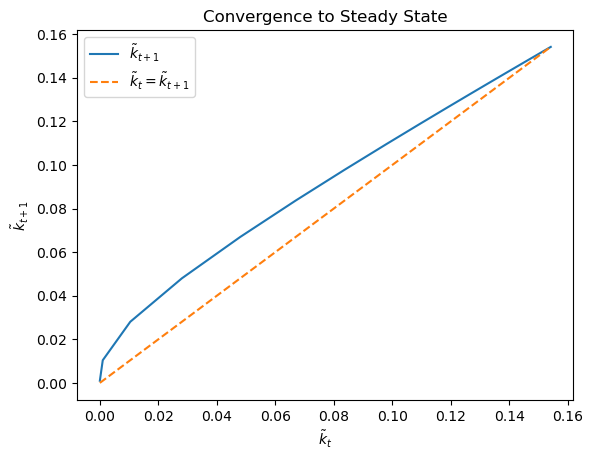

In [5]:
# Creating an instance of the SolowModelClass
model = SolowModelClass()

# Defining the parameters for the simulation
model.val.s_k = 0.1
model.val.g = 0.05
model.val.alpha = 0.33
model.val.delta = 0.3
model.val.sigma = 0.02

# Defining the initial capital level
k_tilde_initial = 0.000001

# Initializing an empty list to store the capital levels
k_tilde_path = [k_tilde_initial]

# Simulating the model
for t in range(model.par.simT):
    # Calculate the next capital level
    k_tilde_next = (1/(1+model.val.g)) * (model.val.s_k * k_tilde_path[-1]**model.val.alpha + (1-model.val.delta) * k_tilde_path[-1])
    # Append the new capital level to the path
    k_tilde_path.append(k_tilde_next)

# Printing the steady-state capital level
print(f'Steady-state capital level: {k_tilde_ss_N}')

# Creating a figure and axes for the plot
fig, ax = plt.subplots()

# Plotting the path of capital
ax.plot(k_tilde_path[:-1], k_tilde_path[1:], label='$\\tilde{k}_{t+1}$')

# Plotting the 45-degree line
k_tilde_range = np.linspace(min(k_tilde_path), max(k_tilde_path), 100)
ax.plot(k_tilde_range, k_tilde_range, label='$\\tilde{k}_t = \\tilde{k}_{t+1}$', linestyle='--')

# Adding labels and title
ax.set_xlabel('$\\tilde{k}_t$')
ax.set_ylabel('$\\tilde{k}_{t+1}$')
ax.set_title('Convergence to Steady State')

# Adding a legend
ax.legend()

# Showing the plot
plt.show()


# Further analysis

We can see how the the depreciation rate $\delta$ affects the convergence towards steady-state. We would expect that when the depreceation rate is high there would be increasing marginal product of capital. This would encourage more investment in capital pusing the economy towards the SS faster. Plotting the solow diagram for different values of $\delta$ we see that higher values of $\delta$ (i.e. the green line) results in lower SS capital and quicker SS convergence, while lower values of $\delta$ (i.e. the blue line) results in higher SS capital and slower SS convergence:

0.545980617393582
0.25471803078034894
0.1541551871243621


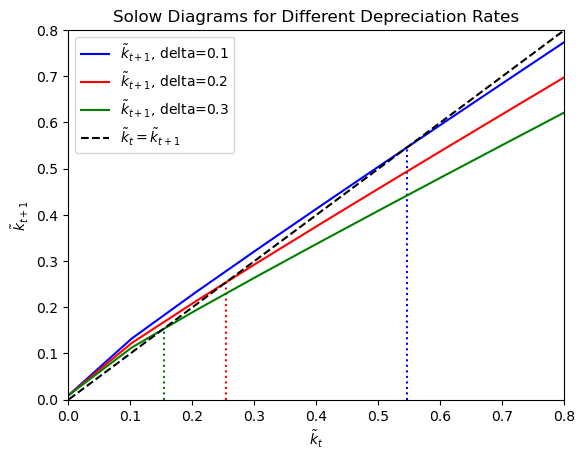

In [6]:
# Creating an instance of the SolowModelClass
model = SolowModelClass()

# Defining the parameters for the simulation
model.val.s_k = 0.1
model.val.g = 0.05
model.val.alpha = 0.33
model.val.sigma = 0.02

# Defining depreciation rates to consider
deltas = [0.1, 0.2, 0.3]

# Defining the range of capital per effective worker
k_tilde_range = np.linspace(0.001, 10, 100)

# Creating a figure and axes for the plot
fig, ax = plt.subplots()

# Defining a color list for different depreciation rates
colors = ['blue', 'red', 'green']

# Iterating over depreciation rates
for delta, color in zip(deltas, colors):
    # Updating the depreciation rate
    model.val.delta = delta

    # Calculating the Solow function for the range of capital per effective worker
    k_tilde_next_range = (1/(1+model.val.g)) * (model.val.s_k * k_tilde_range**model.val.alpha + (1-model.val.delta) * k_tilde_range)

    # Plotting the Solow function
    ax.plot(k_tilde_range, k_tilde_next_range, label=f'$\\tilde{{k}}_{{t+1}}$, delta={delta}', color=color)

    # Calculating the steady-state capital level
    k_tilde_ss = model.solve_numerical_ss()

    # Plotting a vertical line at the steady-state capital level, limited to the SS value in k_t+1
    ax.vlines(k_tilde_ss, 0, (1/(1+model.val.g)) * (model.val.s_k * k_tilde_ss**model.val.alpha + (1-model.val.delta) * k_tilde_ss), linestyle=':', color=color)

# Plotting the 45-degree line
ax.plot(k_tilde_range, k_tilde_range, label='$\\tilde{{k}}_t = \\tilde{{k}}_{t+1}$', linestyle='--', color='black')

# Adding labels and title
ax.set_xlabel('$\\tilde{{k}}_t$')
ax.set_ylabel('$\\tilde{{k}}_{t+1}$')
ax.set_title('Solow Diagrams for Different Depreciation Rates')

# Adding a legend
ax.legend()

plt.xlim([0, 0.8])
plt.ylim([0, 0.8])

# Showing the plot
plt.show()



In [7]:
# Defining the parameters for the simulation
model.val.s_k = 0.3
model.val.g = 0.02
model.val.alpha = 0.33
model.val.delta = 0.05
model.val.sigma = 0.013258
model.val.l_i = 2
model.val.l_m = 1

# Defining the initial capital level
k_tilde_initial = 0.01

# Initializing an empty list to store the capital levels
k_tilde_path = [k_tilde_initial]

# Simulating the model
for t in range(model.par.simT):
    # Calculating the next capital level
    k_tilde_next = (1/(1+model.val.g)) * (model.val.s_k * k_tilde_path[-1]**model.val.alpha + (1-model.val.delta) * k_tilde_path[-1])
    # Appending the new capital level to the path
    k_tilde_path.append(k_tilde_next)

# Calculating BNP per worker at t=10
y_tilde_10 = k_tilde_path[10]**model.val.alpha
print(f'BNP per worker at t=10 is {y_tilde_10}')


BNP per worker at t=10 is 1.2300036661400582


In our model we have an expression for aggregate labour and immigrant labour ($L=(l_{i}^{\frac{\sigma-1}{\sigma}}+l_{m}^{\frac{\sigma-1}{\sigma}})^{\frac{\sigma}{\sigma-1}},\quad\sigma>0,\sigma\neq1$). We can write $\bar{y}_{t}\equiv\frac{Y_{t}}{l_{i}+l_{m}}$ and see how a model with $l_{i}=2$ and $l_{m}=1$ differs from a model with $l_{i}=2$ and $l_{m}=2$. We calculate the difference in GDP pr. worker in period 50:

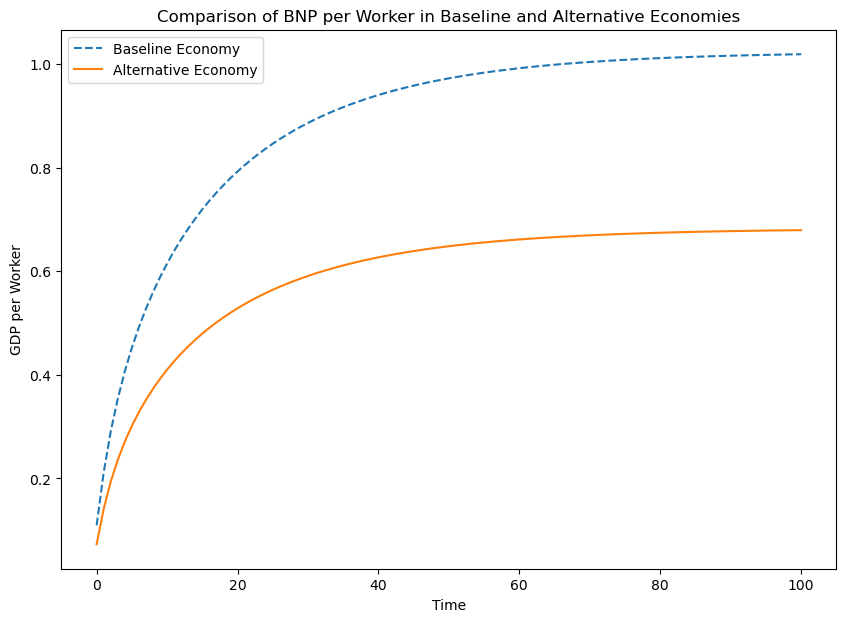

In [8]:
# Creating an instance of the SolowModelClass
model_baseline = SolowModelClass()
model_alt = SolowModelClass()

# Defining the parameters for the simulation
model_baseline.val.s_k = 0.3
model_baseline.val.g = 0.02
model_baseline.val.alpha = 0.33
model_baseline.val.delta = 0.05
model_baseline.val.sigma = 0.013258
model_baseline.val.l_i = 1  # Baseline share of immigrant workers
model_baseline.val.l_m = 1

model_alt.val.s_k = 0.3
model_alt.val.g = 0.02
model_alt.val.alpha = 0.33
model_alt.val.delta = 0.05
model_alt.val.sigma = 0.013258
model_alt.val.l_i = 2  # Alternative share of immigrant workers
model_alt.val.l_m = 1

# Defining the initial capital level
k_tilde_initial = 0.01

# Initializing an empty list to store the capital levels for baseline and alternative economies
k_tilde_path_baseline = [k_tilde_initial]
k_tilde_path_alt = [k_tilde_initial]

# Simulating the model for baseline and alternative economies
for t in range(100):
    # Calculating the next capital level for baseline economy
    k_tilde_next_baseline = (1/(1+model_baseline.val.g)) * (model_baseline.val.s_k * k_tilde_path_baseline[-1]**model_baseline.val.alpha + (1-model_baseline.val.delta) * k_tilde_path_baseline[-1])
    # Appending the new capital level to the path
    k_tilde_path_baseline.append(k_tilde_next_baseline)
    
    # Calculating the next capital level for alternative economy
    k_tilde_next_alt = (1/(1+model_alt.val.g)) * (model_alt.val.s_k * k_tilde_path_alt[-1]**model_alt.val.alpha + (1-model_alt.val.delta) * k_tilde_path_alt[-1])
    # Appending the new capital level to the path
    k_tilde_path_alt.append(k_tilde_next_alt)

# Calculating BNP per worker for baseline and alternative economies
y_tilde_baseline = np.array(k_tilde_path_baseline)**model_baseline.val.alpha / (model_baseline.val.l_i + model_baseline.val.l_m)
y_tilde_alt = np.array(k_tilde_path_alt)**model_alt.val.alpha / (model_alt.val.l_i + model_alt.val.l_m)

# Plotting the BNP per worker for baseline and alternative economies
plt.figure(figsize=(10,7))
plt.plot(y_tilde_baseline, label='Baseline Economy', linestyle='--')
plt.plot(y_tilde_alt, label='Alternative Economy')
plt.xlabel('Time')
plt.ylabel('GDP per Worker')
plt.title('Comparison of BNP per Worker in Baseline and Alternative Economies')
plt.legend()
plt.show()



# Conclusion

In conclusion, the Solow model with immigrant workers provides valuable insights into the impact of immigration on long-run economic growth. The model shows how factors such as depreciation rates and immigration affect the steady-state capital level, GDP per capita, and the speed of convergence to the steady state.

The analysis demonstrates that higher depreciation rates lead to lower steady-state capital levels and faster convergence to the steady state. On the other hand, lower depreciation rates result in higher steady-state capital levels and slower convergence.

Furthermore, the comparison between the baseline and alternative economies with different shares of immigrant workers shows that an increase in the immigrant worker share affects GDP per worker. In the presented example, the alternative economy with a higher share of immigrant workers had a lower GDP per worker compared to the baseline economy. This result suggests that immigration policies can have a significant impact on the long-term economic well-being of a country.

In summary, the Solow model with immigrant workers offers a useful framework for analyzing the effects of immigration on long-run economic growth. Policymakers can use this model to better understand the implications of immigration policies and make informed decisions related to economic development and immigration.